<a href="https://colab.research.google.com/github/we-insub/SelfStudy_Numpy_OpenCV_Deep/blob/main/020_Template_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##템플릿 매칭
템플릿 이미지와 일치하는 이미지의 작은 부분을 찾기위한 디지털 이미지 처리 기술입니다. 품질 관리의 일부, 모바일 로봇을 탐색하는 방법 또는 이미지의 가장자리를 감지하는 방법으로 제조에 사용할 수 있습니다

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
full = cv2.imread("/content/sammy.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

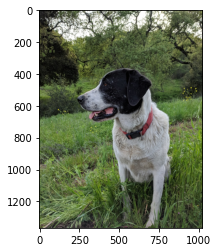

In [9]:
plt.imshow(full)

In [10]:
face = cv2.imread("/content/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

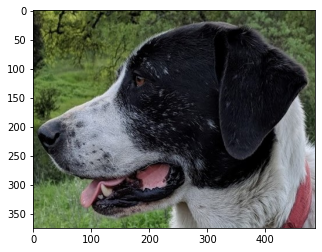

In [11]:
 plt.imshow(face)

In [12]:
face.shape

(375, 486, 3)

In [13]:
full.shape

(1367, 1025, 3)

## 작은 사진을
큰 사진에 붙여서 맞는 픽셀단위의 영역을 찍는다.

In [14]:
sum([1,2,3])

6

In [16]:
mystring = "sum"

In [17]:
eval(mystring)

<function sum>

In [19]:
myfunc = eval(mystring)

In [20]:
myfunc([1,2,3])

6

In [31]:
height, width,channels = face.shape

In [32]:
width

486

In [33]:
height

375

In [34]:
# The Full Image to Search
full = cv2.imread("/content/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread("/content/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

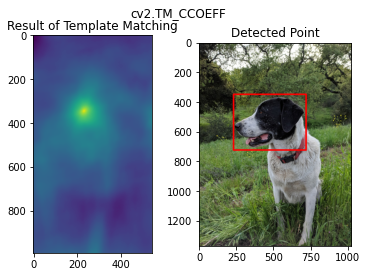

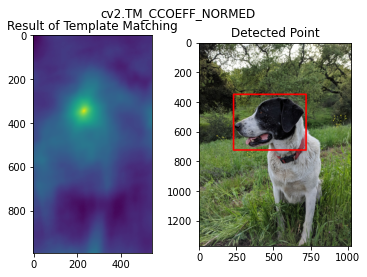

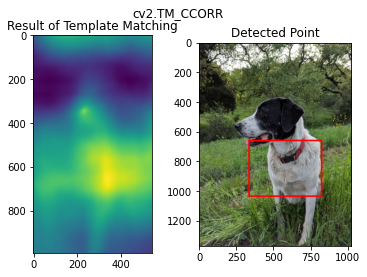

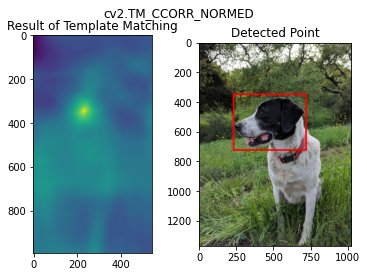

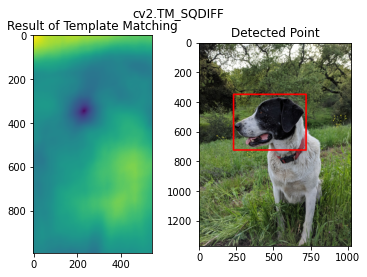

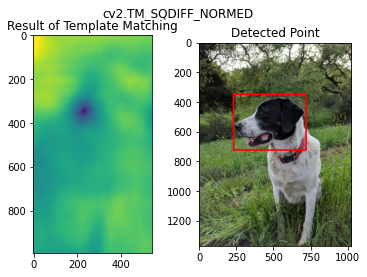

In [35]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    

In [36]:
my_method = eval("cv2.TM_CCOEFF")
res = cv2.matchTemplate(full,face,my_method) # 전체이미지가 있어야 실행이 된다 그래서 풀 사진, 그다음 페이스사진이 들어간것

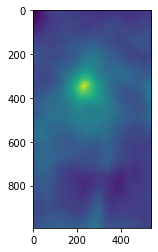

In [37]:
plt.imshow(res) # 작은 얼굴 사진에서 사진을 이렇게 변경한뒤 큰 사진의 사진도 변경한뒤 이게 동일 한 점을 찾아내는것